<a href="https://colab.research.google.com/github/GARCIAAA123/Introduction-to-Machine-Learning/blob/main/1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Introduction to Machine Learning**

# **Chapter 1.2 Polynomial Regression**
---

## Import libraries

In [ ]:
import numpy as np                  # for scientific computing (e.g. culclations with array)
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for visualization

## Dataset loading

In [ ]:
#Download dataset from Github
!wget https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/ice_cream_sales.csv

df_icecream = pd.read_csv("ice_cream_sales.csv")    # making data frame object from csv file
df_icecream

--2023-08-07 17:17:35--  https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/ice_cream_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73 [text/plain]
Saving to: ‘ice_cream_sales.csv’

ice_cream_sales.csv 100%[===================>]      73  --.-KB/s    in 0s      

2023-08-07 17:17:36 (3.72 MB/s) - ‘ice_cream_sales.csv’ saved [73/73]



,temperature,ice cream sales
0,5,12
1,25,143
2,12,56
3,-3,15
4,31,235
5,19,153


## Adding a column which has squared values of x

In [ ]:
X = df_icecream[["temperature"]]            # extracting "temperature" column as input X
X["temperature^2"] = X["temperature"]**2    # adding "temperature^2" column to the input X

t = df_icecream[["ice cream sales"]]        # extracting 'ice cream sales' column as target t

display(X)
display(t)

,temperature,temperature^2
0,5,25
1,25,625
2,12,144
3,-3,9
4,31,961
5,19,361


,ice cream sales
0,12
1,143
2,56
3,15
4,235
5,153


## Optimizing model parameters

There are two columns (terms) in the input X, which are $x$ (=temperatur) and $x^2$. \\
Then, we use the polynomial regression expression:

$f(x) = a[0] x + a[1]x^2 + b$

In [ ]:
from sklearn.linear_model import LinearRegression

# Definition of a linear regression model, optimization and prediction
model = LinearRegression(fit_intercept = True)  # If fit_intercept = True, the intercept b will be used
model.fit(X, t)         # optimization (obtaining a0, a1 and b)
y = model.predict(X)    # prediction

# Model evaluation
R2 = model.score(X,t)
rmse = np.sqrt(np.average((t-y)**2))

print("A =", model.coef_)       # This case, there are 2 parameters: a[0] and a[1]
print("b =", model.intercept_)
print("R^2 =", R2)
print("RMSE=", rmse)

A = [[2.60382378 0.14396214]]
b = [12.72335529]
R^2 = 0.9349297644407798
RMSE= 20.7641072716652


## Prediction using the trained model

In [ ]:
# X0 is a virtual input to draw the regression line
np_X0 = np.arange(-5, 35, 1)                                # [-5, -4, -3, ... ,34]
X0 = pd.DataFrame(data = np_X0, columns=["temperature"])    # convert into pandas DataFrame
X0["temperature^2"] = X0["temperature"]**2                  # adding the squared temperature to the dataframe

display(X0)

,temperature,temperature^2
0,-5,25
1,-4,16
2,-3,9
3,-2,4
4,-1,1
5,0,0
6,1,1
7,2,4
8,3,9
9,4,16


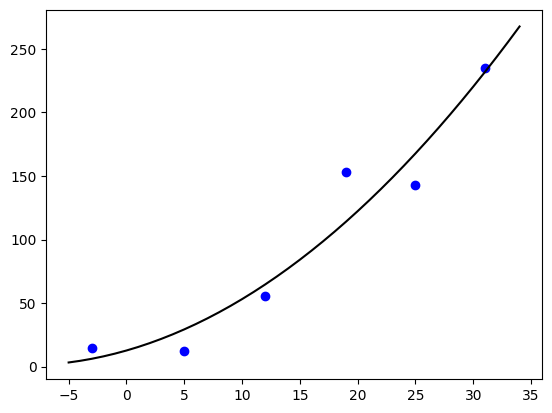

In [ ]:
y0 = model.predict(X0)        # prediction for the virtual input

# Drawing the regression graph
plt.scatter(X["temperature"], t, c="blue")      #plot the originala dataset (There are 6 samples)
plt.plot(X0[["temperature"]], y0, c="black")    #plot the regression line
plt.show()

##🤔 **Exercise 1.2.1**

Add a new column with the cubed values ​​of temperature: ["temperature^3"], and perform a polynomial regression with the cubic function:

$f(x) = a[0] x + a[1]x^2 + a[2]x^3 + b$

Write the result of A, b, $R^2$ and MSE.


A = [[ 0.25991853 0.42246124 -0.00663556]]

b = [8.68793255]

R^2 = 0.9420836848074488

RMSE= 19.589463221837196

In [ ]:
X = df_icecream[["temperature"]]            # extracting "temperature" column as input X
X["temperature^2"] = X["temperature"]**2    # adding "temperature^2" column to the input X
X["temperature^3"] = X["temperature"]**3    # adding "temperature^3" column to the input X

t = df_icecream[["ice cream sales"]]        # extracting 'ice cream sales' column as target t

display(X)
display(t)

,temperature,temperature^2,temperature^3
0,5,25,125
1,25,625,15625
2,12,144,1728
3,-3,9,-27
4,31,961,29791
5,19,361,6859


,ice cream sales
0,12
1,143
2,56
3,15
4,235
5,153


In [ ]:
from sklearn.linear_model import LinearRegression

# Definition of a linear regression model, optimization and prediction
model = LinearRegression(fit_intercept = True)  # If fit_intercept = True, the intercept b will be used
model.fit(X, t)         # optimization (obtaining a0, a1 and b)
y = model.predict(X)    # prediction

# Model evaluation
R2 = model.score(X,t)
rmse = np.sqrt(np.average((t-y)**2))

print("A =", model.coef_)       # This case, there are 2 parameters: a[0] and a[1]
print("b =", model.intercept_)
print("R^2 =", R2)
print("RMSE=", rmse)

A = [[ 0.25991853  0.42246124 -0.00663556]]
b = [8.68793255]
R^2 = 0.9420836848074488
RMSE= 19.589463221837196


In [ ]:
# X0 is a virtual input to draw the regression line
np_X0 = np.arange(-5, 35, 1)                                # [-5, -4, -3, ... ,34]
X0 = pd.DataFrame(data = np_X0, columns=["temperature"])    # convert into pandas DataFrame
X0["temperature^2"] = X0["temperature"]**2                  # adding the squared temperature to the dataframe
X0["temperature^3"] = X0["temperature"]**3                  # adding the cubic temperature to the dataframe

display(X0)

,temperature,temperature^2,temperature^3
0,-5,25,-125
1,-4,16,-64
2,-3,9,-27
3,-2,4,-8
4,-1,1,-1
5,0,0,0
6,1,1,1
7,2,4,8
8,3,9,27
9,4,16,64


## Using PolynomialFeatures in ScikitLearn

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Defining polynomial features and fitting it to the test set
poly_degree = 3
pf = PolynomialFeatures(degree=poly_degree, include_bias=False)  # If inlude_bias=True, output includes constant term
pf.fit(df_icecream[["temperature"]])

print(pf.degree)
print(pf.feature_names_in_)

3
['temperature']


In [ ]:
# Extention to polynomials
X = pf.transform(df_icecream[["temperature"]])    # pf.transform() provides numpy array
t = df_icecream[["ice cream sales"]].to_numpy()   # convert into numpy array

display(X)
display(t)

array([[ 5.0000e+00,  2.5000e+01,  1.2500e+02],
       [ 2.5000e+01,  6.2500e+02,  1.5625e+04],
       [ 1.2000e+01,  1.4400e+02,  1.7280e+03],
       [-3.0000e+00,  9.0000e+00, -2.7000e+01],
       [ 3.1000e+01,  9.6100e+02,  2.9791e+04],
       [ 1.9000e+01,  3.6100e+02,  6.8590e+03]])

array([[ 12],
       [143],
       [ 56],
       [ 15],
       [235],
       [153]])

a = [[ 0.25991853  0.42246124 -0.00663556]]
b = [8.68793255]
R^2 = 0.9420836848074488
RMSE = 19.589463221837196


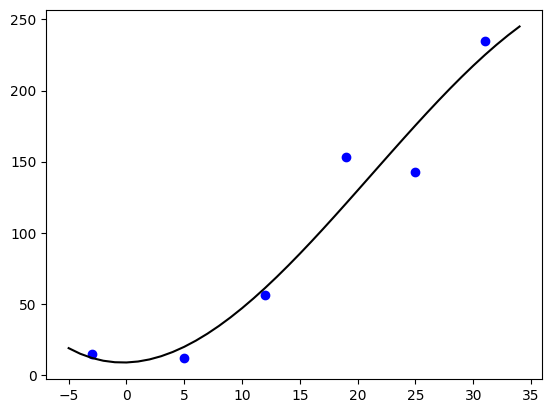

In [ ]:
# Optimizaing the parameters
# Note: X and t are numpy array. Not pandas DataFrame objects
model = LinearRegression(fit_intercept = True)      # model definition (using y = a0*x + a1*x^2 + b)
model.fit(X, t)                                     # fit() can accept both numpy array and pandas DataFrame

# Prediction
y = model.predict(X)

# Model evaluation
R2 = model.score(X,t)
rmse = np.sqrt(np.average((t-y)**2))

print("a =", model.coef_)
print("b =", model.intercept_)
print("R^2 =", R2)
print("RMSE =", rmse)


# Drawing the regression line
np_X0 = np.arange(-5, 35, 1)                            # X0 = [-5, -4, -3, ... ,34]
X0 = pd.DataFrame(data=np_X0, columns=["temperature"])  # Convert into pandas DataFrame

X0 = pf.transform(X0)   # Extension X0 to polynomial
y0 = model.predict(X0)  # Prediction

plt.scatter(X[:,0], t, c="blue")    # X[:,0] means the first column of X
plt.plot(X0[:,0], y0, c="black")    # X0[:,0] means the first column of X0
plt.show()

## Loading "GDP per capita in Finland" dataset

--2023-08-07 17:23:17--  https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/gdp_per_capita_finland.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1157 (1.1K) [text/plain]
Saving to: ‘gdp_per_capita_finland.csv’

gdp_per_capita_finl 100%[===================>]   1.13K  --.-KB/s    in 0s      

2023-08-07 17:23:17 (64.2 MB/s) - ‘gdp_per_capita_finland.csv’ saved [1157/1157]



,year,GDP per capita (USD)
0,1960,1179.353011
1,1961,1327.427224
2,1962,1411.702398
3,1963,1522.319242
4,1964,1707.503938
...,...,...
58,2018,49987.626160
59,2019,48629.858230
60,2020,49169.719340
61,2021,53489.752020


<Axes: xlabel='year'>

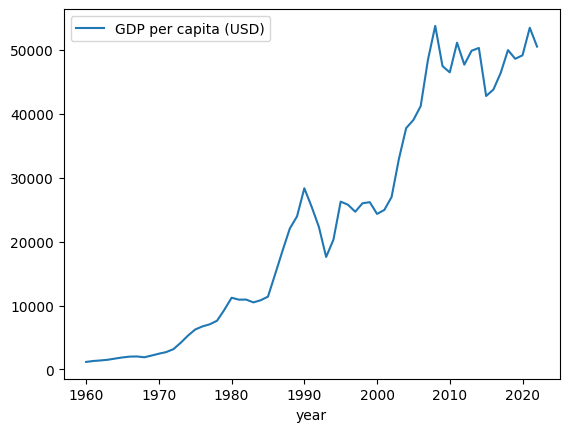

In [ ]:
# Download dataset from Github
!wget https://raw.githubusercontent.com/a-ymst/IntroductionToMachineLearning/main/Datasets/gdp_per_capita_finland.csv

df_gdp = pd.read_csv("gdp_per_capita_finland.csv")
display(df_gdp)
df_gdp.plot(x="year", y="GDP per capita (USD)", kind="line")

## Dataset separation

X_train.shape =  (44, 1)
X_test.shape =  (19, 1)


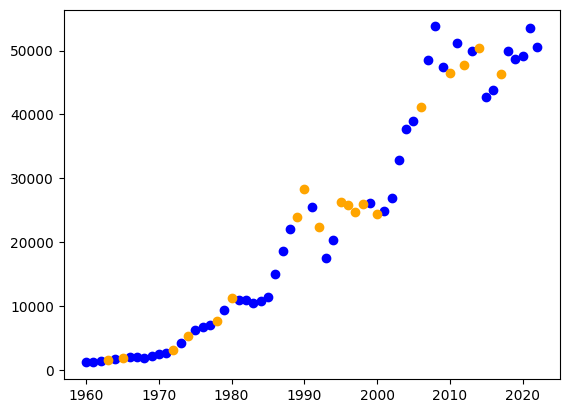

In [ ]:
from sklearn.model_selection import train_test_split

X = df_gdp[["year"]]
t = df_gdp[["GDP per capita (USD)"]]

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.3, random_state = 47)

print("X_train.shape = ", X_train.shape)
print("X_test.shape = ", X_test.shape)
plt.scatter(X_train, t_train, c="blue")
plt.scatter(X_test, t_test, c="orange")

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Defining a a standardization scaler and fitting it to the training set
scaler = StandardScaler()
scaler.fit(X_train)      # Scaler should be fit to the training set

print("mean = ", scaler.mean_)
print("std = ", np.sqrt(scaler.var_))

mean =  [1990.56818182]
std =  [19.05661151]


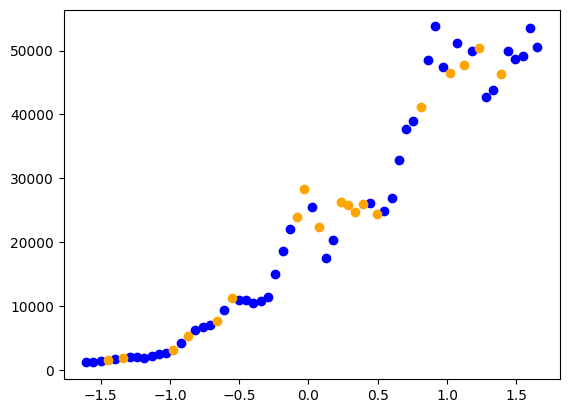

In [ ]:
# Standardization for the training and the test set
std_X_train = scaler.transform(X_train)
std_X_test = scaler.transform(X_test)

plt.scatter(std_X_train, t_train, c="blue")
plt.scatter(std_X_test, t_test, c="orange")

## Extention to polynomials and optimization

In [ ]:
# For saving the results
df_results = pd.DataFrame(columns=["R^2", "RMSE(train)", "RMSE(test)"])

,R^2,RMSE(train),RMSE(test)
1,0.931681,4913.976181,3892.758049
2,0.943184,4481.242516,3632.467379
3,0.958348,3836.907487,3553.768546
4,0.961647,3681.810365,3630.533711
5,0.962660,3632.899641,3526.567284
6,0.964440,3545.233060,3816.552360
7,0.973168,3079.550477,3806.276892
8,0.974635,2994.208019,3471.540261
9,0.977559,2816.329482,3803.539881
10,0.987663,2088.158477,3627.495811


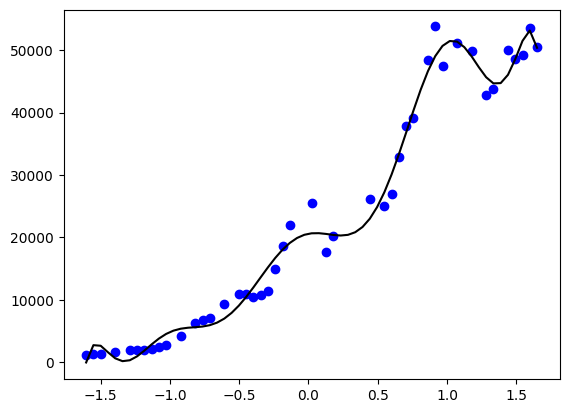

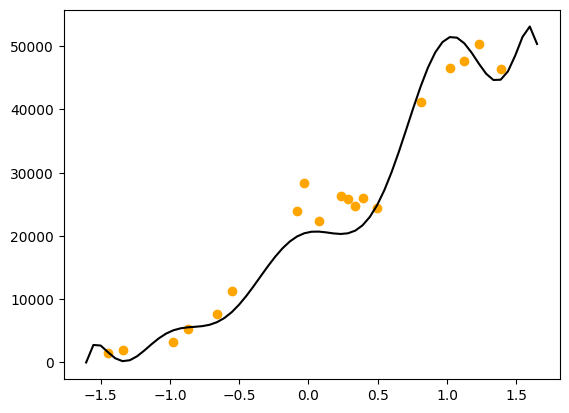

In [ ]:
from sklearn.linear_model import LinearRegression

# Definition of PolynomialFeatures and fitting it
poly_degree = 10
pf = PolynomialFeatures(degree=poly_degree, include_bias=False)
pf.fit(std_X_train)

# Extention to polynomials
X_train = pf.transform(std_X_train)
X_test = pf.transform(std_X_test)

# Model definition and optimization
model = LinearRegression(fit_intercept = True)
model.fit(X_train, t_train)   # Parameter optimization

# Prediction
y_train = model.predict(X_train)
y_test = model.predict(X_test)

# Model evaluation
R2 = model.score(X_train, t_train)
rmse_train = np.sqrt(np.average((t_train - y_train)**2))    # calclate RMSE on train dataset
rmse_test = np.sqrt(np.average((t_test - y_test)**2))       # calclate RMSE on test dataset

# save the result
df_results.loc[poly_degree] = [R2, rmse_train, rmse_test]
display(df_results)


# Drawing the  regression line
np_X0 = np.arange(1960, 2023, 1) # [1960, 1951, ... , 2022]
df_X0 = pd.DataFrame(data = np_X0, columns=["year"])

std_X0 = scaler.transform(df_X0[["year"]])      # Standardization for dammy input
X0 = pf.transform(std_X0)                       # extend X0 to polynomial
y0 = model.predict(X0)

plt.scatter(X_train[:,0], t_train, c="blue")
plt.plot(X0[:,0], y0, c="black")
plt.show()

plt.scatter(X_test[:,0], t_test, c="orange")
plt.plot(X0[:,0], y0, c="black")
plt.show()

##🤔 **Exercise 1.2.2**

Perform polynomial regression with varying dimensionality from 1 to 10, and find the coefficient of determination $R^2$, RMSE on both the training and test set.



,R^2,RMSE(train),RMSE(test)
1,0.931681,4913.976181,3892.758049
2,0.943184,4481.242516,3632.467379
3,0.958348,3836.907487,3553.768546
4,0.961647,3681.810365,3630.533711
5,0.962660,3632.899641,3526.567284
6,0.964440,3545.233060,3816.552360
7,0.973168,3079.550477,3806.276892
8,0.974635,2994.208019,3471.540261
9,0.977559,2816.329482,3803.539881
10,0.987663,2088.158477,3627.495811


<Axes: >

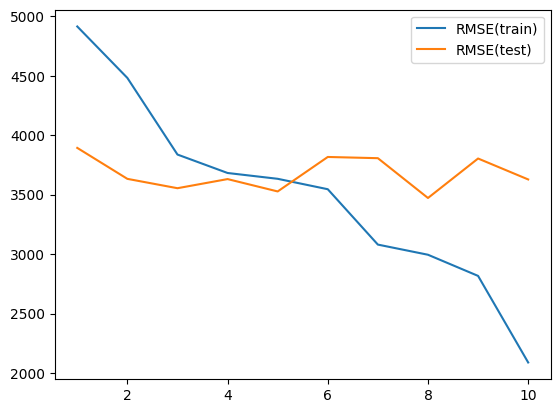

In [ ]:
display(df_results)
df_results.plot(y=["RMSE(train)", "RMSE(test)"])

##🤔 **Exercise 1.2.3**

Write down your thoughts on whether polynomial regression should work well to predict past or future values ​​outside the time period of the dataset.



Polynomial regression works for data within its range with clear polynomial relationships. Extrapolation beyond the data range is risky due to potential inaccuracies and overfitting. For time series and future predictions, specialized techniques are preferred.